In [8]:
library(datasets)
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [9]:
# Compute Hopkins statistic for iris dataset
res <- get_clust_tendency(iris[, 3:4], n = nrow(iris[, 3:4])-1, graph = TRUE)
res$hopkins_stat

[1] 0.8347945

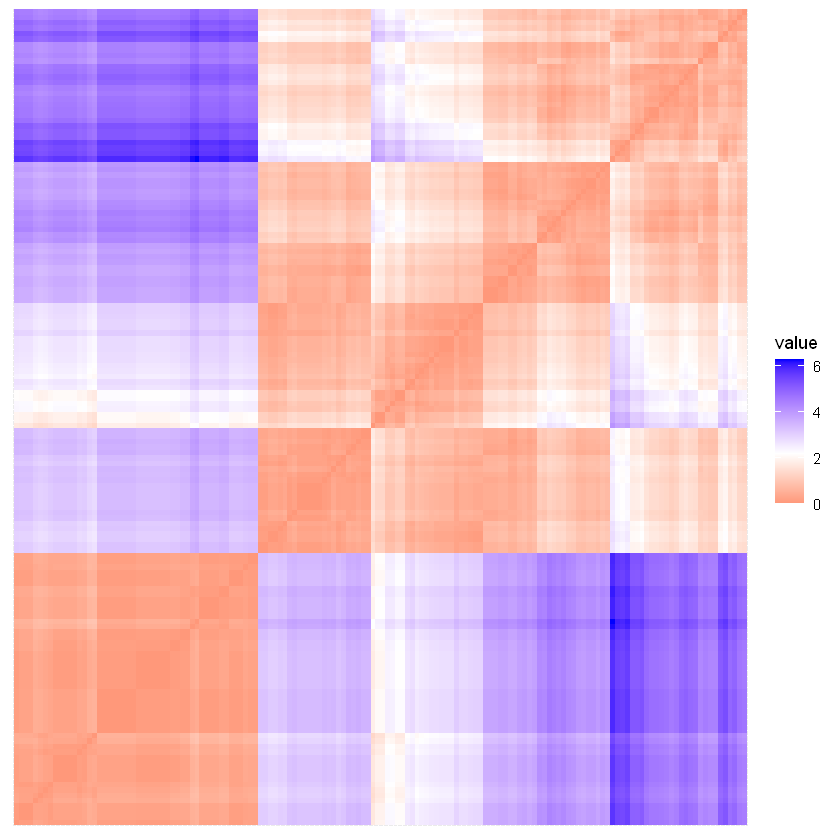

In [10]:
res$plot

In [5]:
wss =(nrow(iris)-1) * sum(apply(iris[,3:4],2,var))

In [6]:
wss

[1] 550.8953

In [14]:
for (i in 1:6) wss[i] = sum(kmeans(iris[,3:4], centers = i, nstart = 20)$withinss)

In [15]:
print(wss)

[1] 550.89533  86.39022  31.37136  19.46599  13.91691  11.02515


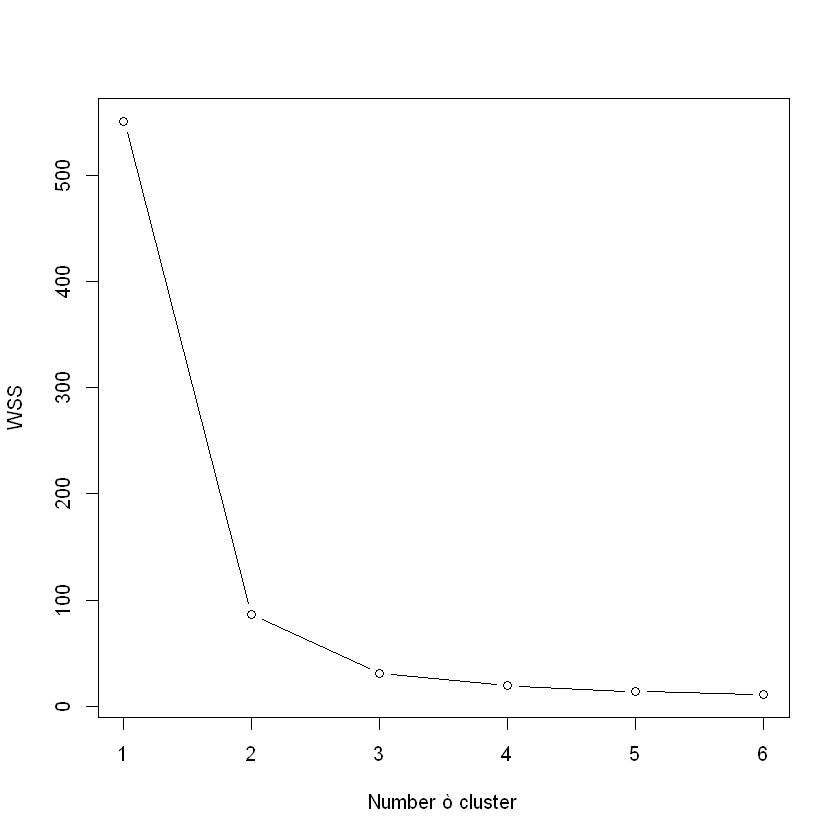

In [16]:
plot(1:6, wss, type='b', xlab = 'Number ò cluster', ylab = 'WSS')

In [17]:
set.seed(20)

In [18]:
irisCluster = kmeans(iris[,3:4], centers = 3, nstart = 20)

In [19]:
irisCluster

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [23]:
print(irisCluster$center)

  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000


In [24]:
library(factoextra)

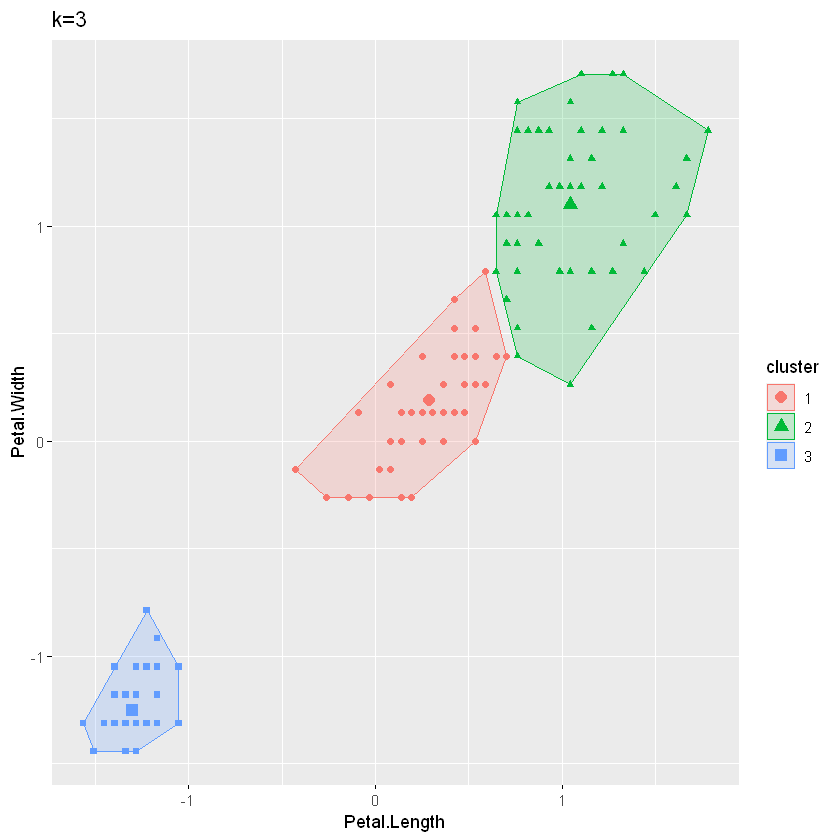

In [25]:
fviz_cluster(irisCluster, geom = 'point', data =  iris[,3:4]) + ggtitle('k=3')

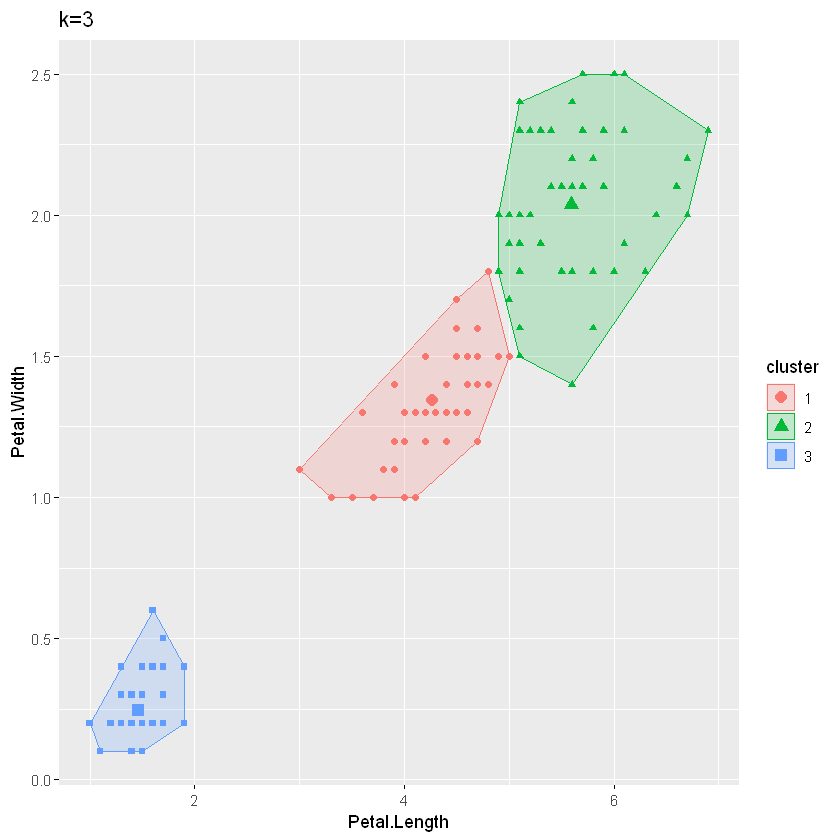

In [26]:
fviz_cluster(irisCluster, geom = 'point', data =  iris[,3:4], stand = F) + ggtitle('k=3')

In [40]:
newdata = data.frame(Petal.Length = c(1.45, 3.45, 5.25),
                     Petal.Width = c(0.25, 1.45, 2.35))

In [41]:
# Solution 1
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

In [42]:
result <- predict.kmeans(irisCluster, newdata)
result

[1] 3 1 2

In [44]:
install.packages('clue')

Installing package into 'C:/Users/AW/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'clue' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AW\AppData\Local\Temp\RtmpGAF5tZ\downloaded_packages


In [45]:
#Solution 2
library('clue')

In [46]:
cl_predict(irisCluster, newdata =  newdata)

Class ids:
[1] 3 1 2

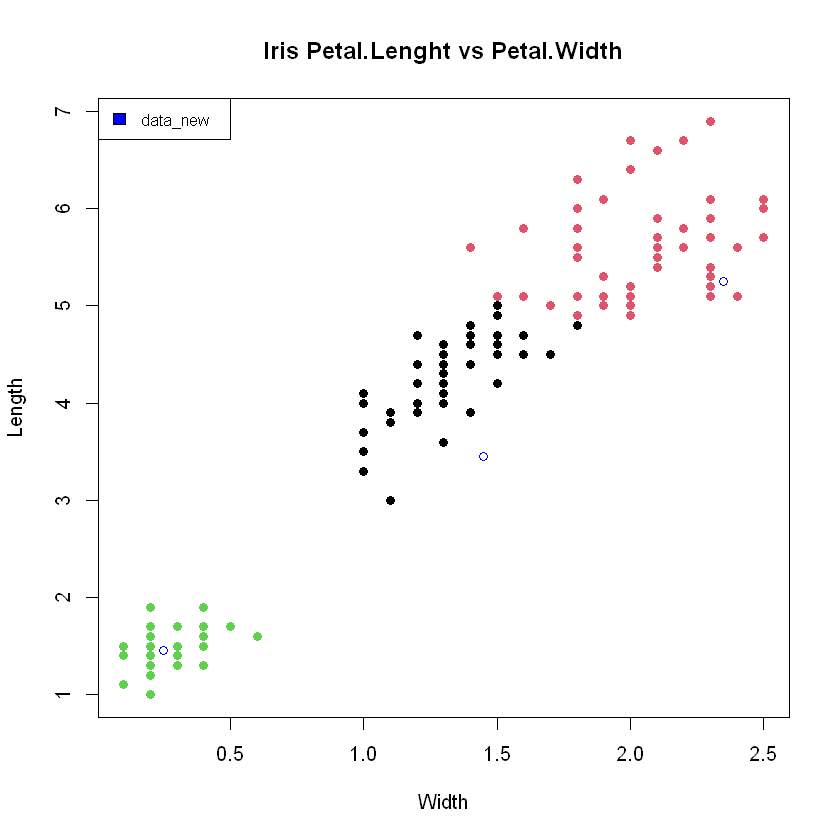

In [48]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
plot(x = iris$Petal.Width,y = iris$Petal.Length,
     xlab = "Width",
     ylab = "Length",
     main = "Iris Petal.Lenght vs Petal.Width",
     col = irisCluster$cluster,
     pch = 19
    )
lines(newdata$Petal.Width, newdata$Petal.Length, col='blue', type='p')
legend("topleft", c("data_new"), cex=0.8, fill = c("blue"))